In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [2]:
data_salary = pd.read_csv("Salary_Data.csv")
data_salary.shape

(30, 2)

In [3]:
data_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data_salary.sample(7)

,YearsExperience,Salary
9,3.7,57189.0
19,6.0,93940.0
5,2.9,56642.0
15,4.9,67938.0
2,1.5,37731.0
8,3.2,64445.0
4,2.2,39891.0


In [5]:
data_salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [6]:
data_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
data_salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

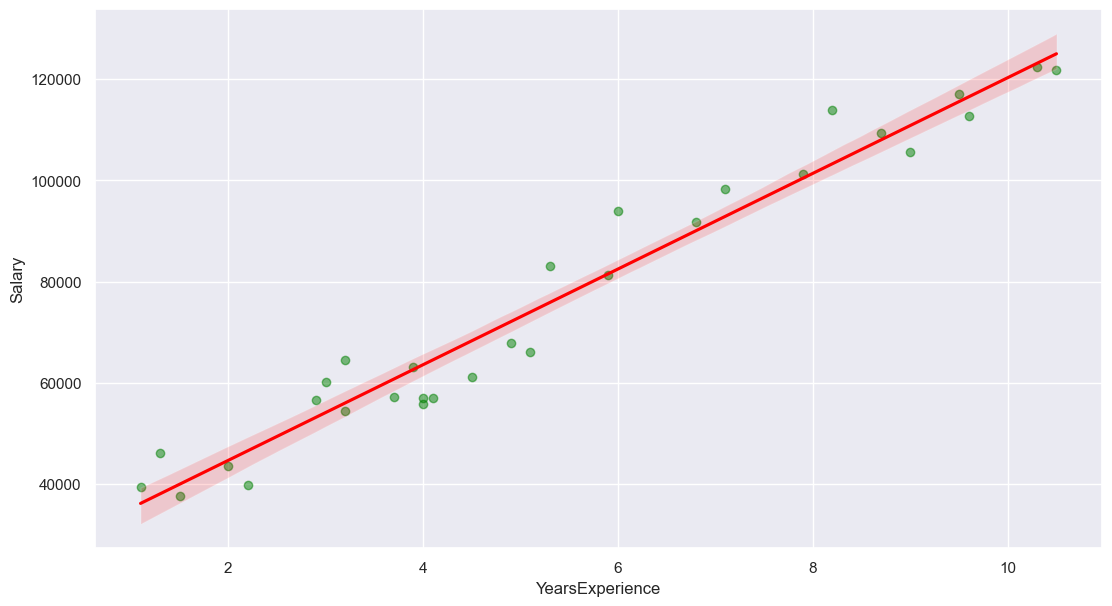

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,7))
sns.regplot(x="YearsExperience", y="Salary", data=data_salary, scatter_kws={"color": "green", 'alpha': 0.5}, line_kws={"color": "red"})
plt.show()

In [10]:
data_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Text(0.5, 1.0, 'NO Transformation')

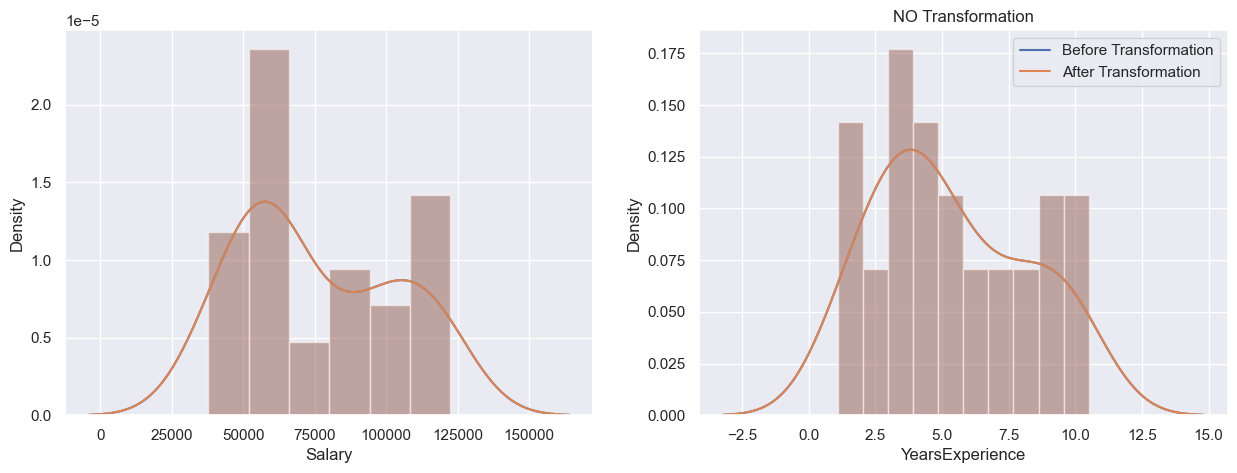

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(data_salary['Salary'], bins = 6, kde = True, ax=axes[0])
sns.distplot(data_salary['Salary'], bins = 6, kde = True, ax=axes[0])

sns.distplot(data_salary['YearsExperience'], bins = 10, kde = True, ax=axes[1])
sns.distplot(data_salary['YearsExperience'], bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("NO Transformation")

Text(0.5, 1.0, 'Log Transformation')

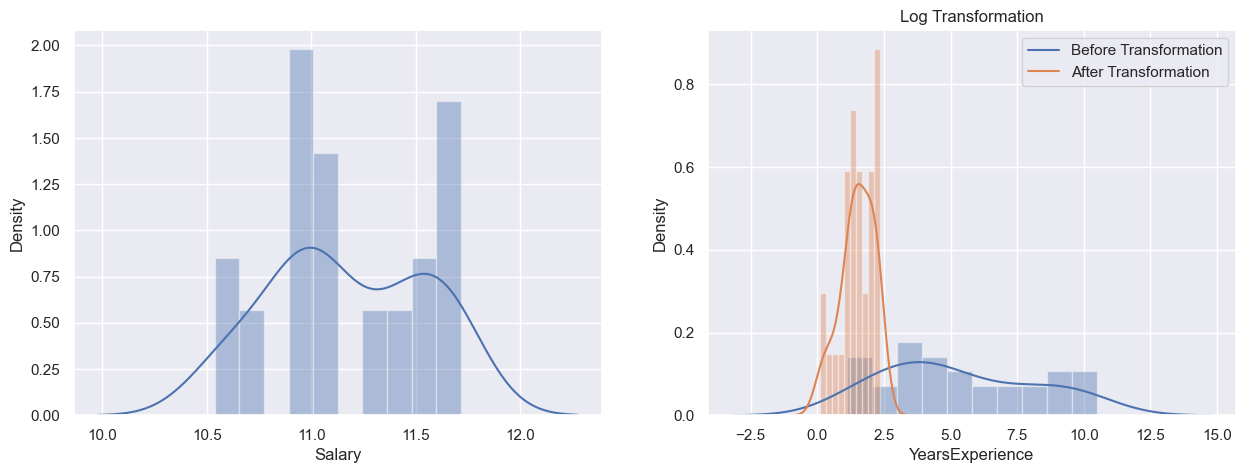

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(np.log(data_salary['Salary']), bins = 10, kde = True, ax=axes[0])
# sns.distplot(data_salary['Salary'], bins = 10, kde = True, ax=axes[0])

sns.distplot(data_salary['YearsExperience'], bins = 10, kde = True, ax=axes[1])
sns.distplot(np.log(data_salary['YearsExperience']), bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("Log Transformation")

Text(0.5, 1.0, 'Squareroot Transformation')

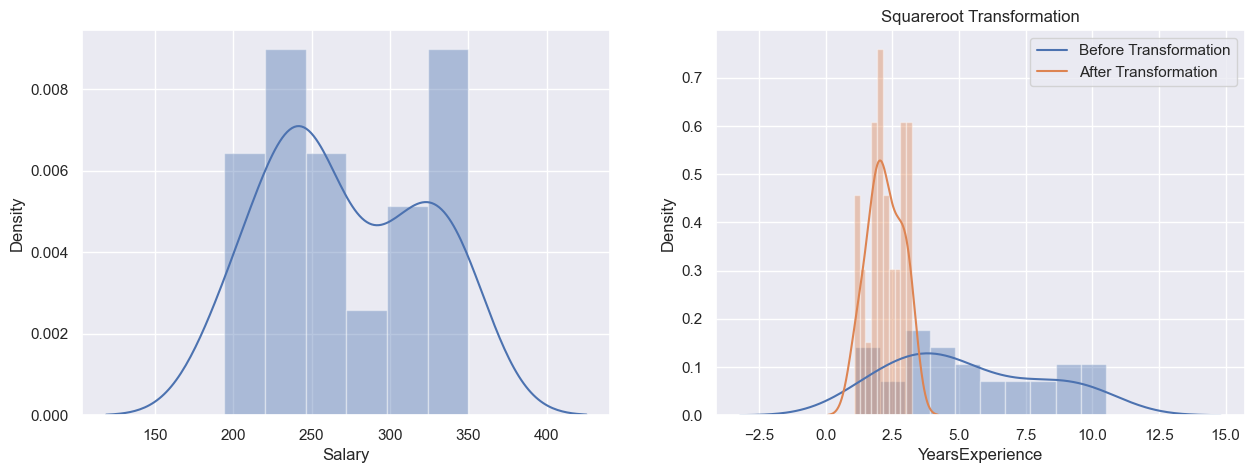

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# sns.distplot(data_salary['Salary'], bins = 6, kde = True, ax=axes[0])
sns.distplot(np.sqrt(data_salary['Salary']), bins = 6, kde = True, ax=axes[0])

sns.distplot(data_salary['YearsExperience'], bins = 10, kde = True, ax=axes[1])
sns.distplot(np.sqrt(data_salary['YearsExperience']), bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("Squareroot Transformation")

Text(0.5, 1.0, 'Cuberoot Transformation')

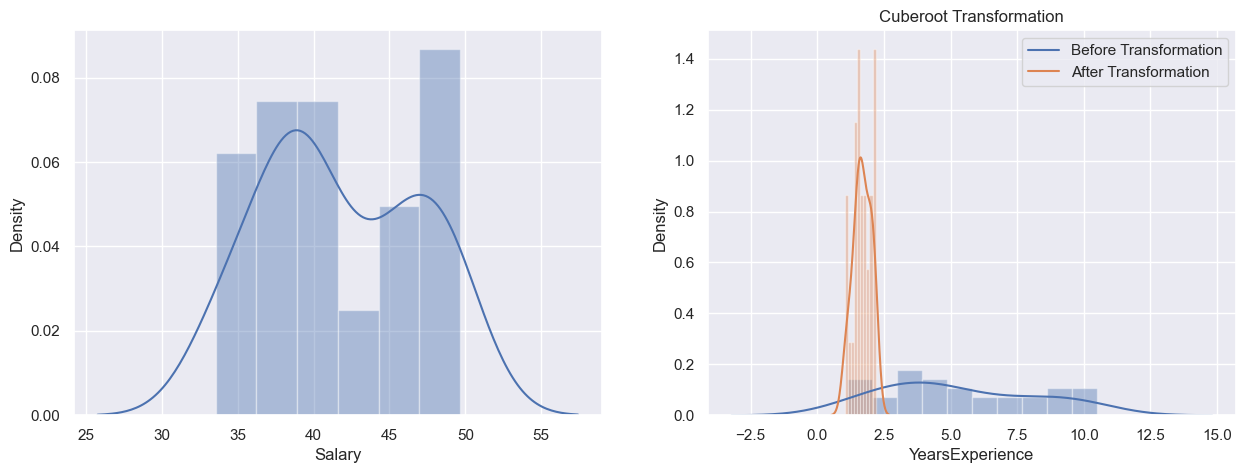

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# sns.distplot(data_salary['Salary'], bins = 6, kde = True, ax=axes[0])
sns.distplot(np.cbrt(data_salary['Salary']), bins = 6, kde = True, ax=axes[0])

sns.distplot(data_salary['YearsExperience'], bins = 10, kde = True, ax=axes[1])
sns.distplot(np.cbrt(data_salary['YearsExperience']), bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("Cuberoot Transformation")

In [28]:
model_reg = smf.ols("Salary~YearsExperience",data = data_salary).fit()

In [29]:
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        22:12:53   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model_log = smf.ols("np.log(Salary)~np.log(YearsExperience)",data = data_salary).fit()

In [33]:
model_sqrt = smf.ols("np.sqrt(Salary)~np.sqrt(YearsExperience)",data = data_salary).fit()

In [34]:
model_cbrt = smf.ols("np.cbrt(Salary)~np.cbrt(YearsExperience)",data = data_salary).fit()

In [39]:
pred_y =np.square(model_reg.predict(data_salary['YearsExperience']))
pred_y_log =np.exp(model_log.predict(data_salary['YearsExperience']))
pred_y_sqrt =np.square(model_sqrt.predict(data_salary['YearsExperience']))
pred_y_cbrt =pow(model_cbrt.predict(data_salary['YearsExperience']),3)

In [40]:
rmse_reg =np.sqrt(mean_squared_error(data_salary['Salary'], pred_y))
rmse_log =np.sqrt(mean_squared_error(data_salary['Salary'], pred_y_log))
rmse_sqrt =np.sqrt(mean_squared_error(data_salary['Salary'], pred_y_sqrt))
rmse_cbrt =np.sqrt(mean_squared_error(data_salary['Salary'], pred_y_cbrt))

In [41]:
RMSE_values = rmse_reg, rmse_log, rmse_sqrt, rmse_cbrt

In [42]:
R2 = []
ADJ_R2 = []
MODELS = ['model_reg', 'model_log', 'model_sqrt', 'model_cbrt']
for i in MODELS:
    model = globals()[i] 
    R2.append(model.rsquared)
    ADJ_R2.append(model.rsquared_adj)
models_data = pd.DataFrame({'R_Squared':R2,'Adj_R_squared':ADJ_R2, 'RMSE':RMSE_values },index=MODELS)

models_data

,R_Squared,Adj_R_squared,RMSE
model_reg,0.956957,0.955419,7.772709e+09
model_log,0.905215,0.901830,7.219717e+03
model_sqrt,0.941949,0.939876,5.960647e+03
model_cbrt,0.932443,0.930031,6.232815e+03


In [57]:
# models_data.sort_values(by='RMSE', ascending=True)

Here, we can see model_reg that is square roor tranformation have less RMSE and high R2 and R2 adjusted values, so this is the best model

In [56]:
#Coefficients
model_reg.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [55]:
print(f'model t-values:\n{model_reg.tvalues}\n-----------------\nmodel p-values: \n{model_reg.pvalues}')    

model t-values:
Intercept          11.346940
YearsExperience    24.950094
dtype: float64
-----------------
model p-values: 
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [46]:
data_salary.sample(5)

,YearsExperience,Salary
27,9.6,112635.0
16,5.1,66029.0
3,2.0,43525.0
20,6.8,91738.0
15,4.9,67938.0


In [54]:
#Predict for sorting value 
new_exp=pd.Series([6.0])
pred_salary=pd.DataFrame(new_exp,columns=['YearsExperience'])
model_reg.predict(pred_salary)

0    82491.974127
dtype: float64

In [53]:
predicted = pd.DataFrame()
predicted['YearsExperience'] = data_salary.YearsExperience
predicted['Salary'] = data_salary.Salary
predicted['Predicted_Salary'] = pd.DataFrame((model_reg.predict(predicted.YearsExperience)))
predicted

,YearsExperience,Salary,Predicted_Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
